In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (4, 3)

In [2]:
#load the file and set the first column as the index
train = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\Assignment 1\diamonds.csv",index_col = 0)

#### Steps of Data Exploration and Preparation
Remember the quality of your inputs decide the quality of your output. So, once you have got your business hypothesis ready, it makes sense to spend lot of time and efforts here. With my personal estimate, data exploration, cleaning and preparation can take up to 70% of your total project time.
Below are the steps involved to understand, clean and prepare your data for building your predictive model:
* Variable Identification
* Univariate Analysis
* Bi-variate Analysis
* Missing values treatment
* Outlier treatment
* Variable transformation
* Variable creation

Finally, we will need to iterate over steps 4 – 7 multiple times before we come up with our refined model.

##### Variable Identification
First, identify Predictor (Input) and Target (output) variables. Next, identify the data type and category of the variables.

Firs we should say a few words about classifying variables:

* Numerical variables can be classified as continuous or discrete based on whether or not the variable can take on an infinite number of values or only non-negative whole numbers, respectively.

* If the variable is categorical, we can determine if it is ordinal based on whether or not the levels have a natural ordering.

###### Exploring numerical data

When describing shapes of numerical distributions we highlight:
* shape:

    * right-skewed, left-skewed, symmetric (skew is to the side of the longer tail)
    * unimodal, bimodal, multimodal, uniform
    
* center: mean (mean), median (median), mode (not always useful)

* spead: range (range), standard deviation (sd), inter-quartile range (IQR)

* unusal observations
![photo](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Data_exploration_11.png)

![photo](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Data_exploration_2.png)

###### Exploring variables individually
In the next section we will explore and visualize the distributions of the variables in this dataset individual. This type of analysis is also called univariate analysis.

In [3]:
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
train.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
print ("\n\n---------------------")
print ("TRAIN SET INFORMATION")
print ("---------------------")
print ("Shape of training set:", train.shape, "\n")
print ("Column Headers:", list(train.columns.values), "\n")
print (train.dtypes)



---------------------
TRAIN SET INFORMATION
---------------------
Shape of training set: (53940, 10) 

Column Headers: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'] 

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


So there are 53940 number of observations and 10 different variables.

The different kind of variables are : 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'

##### Why missing values treatment is required?

Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.

###### Why my data has missing values?

We looked at the importance of treatment of missing values in a dataset. Now, let’s identify the reasons for occurrence of these missing values. They may occur at two stages:

1. Data Extraction: It is possible that there are problems with extraction process. In such cases, we should double-check for correct data with data guardians. Some hashing procedures can also be used to make sure data extraction is correct. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct. They can be categorized in four types:
    * Missing completely at random: This is a case when the probability of missing variable is same for all observations. For example: respondents of data collection process decide that they will declare their earning after tossing a fair coin. If an head occurs, respondent declares his / her earnings & vice versa. Here each observation has equal chance of missing value.
    * Missing at random: This is a case when variable is missing at random and missing ratio varies for different values / level of other input variables. For example: We are collecting data for age and female has higher missing value compare to male.
    * Missing that depends on unobserved predictors: This is a case when the missing values are not random and are related to the unobserved input variable. For example: In a medical study, if a particular diagnostic causes discomfort, then there is higher chance of drop out from the study. This missing value is not at random unless we have included “discomfort” as an input variable for all patients.
    * Missing that depends on the missing value itself: This is a case when the probability of missing value is directly correlated with missing value itself. For example: People with higher or lower income are likely to provide non-response to their earning.
 

###### Which are the methods to treat missing values ?

1. Deletion:  It is of two types: List Wise Deletion and Pair Wise Deletion.
    * In list wise deletion, we delete observations where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.
    * In pair wise deletion, we perform analysis with all cases in which the variables of interest are present. Advantage of this method is, it keeps as many cases available for analysis. One of the disadvantage of this method, it uses different sample size for different variables.

![photo](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Data_Exploration_2_2.png)

    * Deletion methods are used when the nature of missing data is “Missing completely at random” else non random missing values can bias the model output.
2. Mean/ Mode/ Median Imputation: Imputation is a method to fill in the missing values with estimated ones. The objective is to employ known relationships that can be identified in the valid values of the data set to assist in estimating the missing values. Mean / Mode / Median imputation is one of the most frequently used methods. It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable. It can be of two types:-
    * Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median. Like in above table, variable “Manpower” is missing so we take average of all non missing values of “Manpower”  (28.33) and then replace missing value with it.
    * Similar case Imputation: In this case, we calculate average for gender “Male” (29.75) and “Female” (25) individually of non missing values then replace the missing value based on gender. For “Male“, we will replace missing values of manpower with 29.75 and for “Female” with 25.
    
3. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.We can use regression, ANOVA, Logistic regression and various modeling technique to perform this. There are 2 drawbacks for this approach:
    * The model estimated values are usually more well-behaved than the true values
    * If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

4. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

*** Advantages:
    * k-nearest neighbour can predict both qualitative & quantitative attributes
    * Creation of predictive model for each attribute with missing data is not required
    * Attributes with multiple missing values can be easily treated
    * Correlation structure of the data is taken into consideration

*** Disadvantage:
    * KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
    * Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.


In [6]:
import re
missing_values = []
nonumeric_values = []

print ("TRAINING SET INFORMATION")
print ("========================\n")

for column in train:
    # Find all the unique feature values
    uniq = train[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

TRAINING SET INFORMATION

'carat' has 273 unique values
~~Listing up to 10 unique values~~
[ 0.23  0.21  0.29  0.31  0.24  0.26  0.22  0.3   0.2   0.32]

-----------------------------------------------------------------------

'cut' has 5 unique values
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

-----------------------------------------------------------------------

'color' has 7 unique values
['E' 'I' 'J' 'H' 'F' 'G' 'D']

-----------------------------------------------------------------------

'clarity' has 8 unique values
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']

-----------------------------------------------------------------------

'depth' has 184 unique values
~~Listing up to 10 unique values~~
[ 61.5  59.8  56.9  62.4  63.3  62.8  62.3  61.9  65.1  59.4]

-----------------------------------------------------------------------

'table' has 127 unique values
~~Listing up to 10 unique values~~
[ 55.  61.  65.  58.  57.  56.  54.  62.  59.  63.]

----------------------

There are no missing values. 

It has 3 categorical variables: cut, color and clarity

In [7]:
# Check for duplicate index or rows
idsUnique = len(set(train.index))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 53940 total entries


##### Descriptive Statistics

In [8]:
#get summary of numerical variables
train.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.
It looks that Price is skewed

###### Skewness and Kurtosis
Beyond measures of center and spread, descriptive statistics include measures that give you a sense of the shape of a distribution. Skewness measures the skew or asymmetry of a distribution while kurtosis measures the "peakedness" of a distribution.  We won't go into the exact calculations behind skewness and kurtosis, but they are essentially just statistics that take the idea of variance a step further: while variance involves squaring deviations from the mean, skewness involves cubing deviations from the mean and kurtosis involves raising deviations from the mean to the 4th power.

Pandas has built in functions for checking skewness and kurtosis, df.skew() and df.kurt() respectively:

In [9]:
# Skewness of the distribution

print(train.skew())

# Values close to 0 show less skew
# The attributes are not skewed too much. Some algos may benefit if skew is corrected

carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64


In [10]:
# Skewness of the distribution

print(train.kurt())

#Since kurtosis measures peakedness, 
#we'd expect the flat (uniform) distribution have low kurtosis while the distributions
#with sharper peaks should have higher kurtosis.

carat     1.256635
depth     5.739415
table     2.801857
price     2.177696
x        -0.618161
y        91.214557
z        47.086619
dtype: float64


The normally distributed data has a kurtosis near zero, the flat distribution has negative kurtosis and the two pointier distributions have positive kurtosis.

###### We have 'x','y','z' as 0. let us check how many are there and deal with the outliers


In [13]:
#Check when a value in a cloumn is zero
train[(train['z'] == 0)].count()

carat      20
cut        20
color      20
clarity    20
depth      20
table      20
price      20
x          20
y          20
z          20
dtype: int64

##### What is an Outlier?

Outlier is a commonly used terminology by analysts and data scientists as it needs close attention else it can result in wildly wrong estimations. Simply speaking, Outlier is an observation that appears far away and diverges from an overall pattern in a sample.

Let’s take an example, we do customer profiling and find out that the average annual income of customers is $0.8 million. But, there are two customers having annual income of $4 and $4.2 million. These two customers annual income is much higher than rest of the population. These two observations will be seen as Outliers.

![photo](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier.png)



##### What are the types of Outliers?

Outlier can be of two types: Univariate and Multivariate. Above, we have discussed the example of univariate outlier. These outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions.

Let us understand this with an example. Let us say we are understanding the relationship between height and weight. Below, we have univariate and bivariate distribution for Height, Weight. Take a look at the box plot. We do not have any outlier (above and below 1.5*IQR, most common method). Now look at the scatter plot. Here, we have two values below and one above the average in a specific segment of weight and height.

![photo](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_21-1024x260.png)

###### What causes Outliers?

Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence. Causes of outliers can be classified in two broad categories:

    * Artificial (Error) / Non-natural
    * Natural.

Let’s understand various types of outliers in more detail:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data. For example: Annual income of a customer is $100,000. Accidentally, the data entry operator puts an additional zero in the figure. Now the income becomes $1,000,000 which is 10 times higher. Evidently, this will be the outlier value when compared with rest of the population.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty. For example: There are 10 weighing machines. 9 of them are correct, 1 is faulty. Weight measured by people on the faulty machine will be higher / lower than the rest of people in the group. The weights measured on faulty machine can lead to outliers.
3. Experimental Error: Another cause of outliers is experimental error. For example: In a 100m sprint of 7 runners, one runner missed out on concentrating on the ‘Go’ call which caused him to start late. Hence, this caused the runner’s run time to be more than other runners. His total run time can be an outlier.
4. Intentional Outlier: This is commonly found in self-reported measures that involves sensitive data. For example: Teens would typically under report the amount of alcohol that they consume. Only a fraction of them would report actual value. Here actual values might look like outliers because rest of the teens are under reporting the consumption.
5. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
6. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
7. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.
 

###### What is the impact of Outliers on a dataset?

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:

It increases the error variance and reduces the power of statistical tests
If the outliers are non-randomly distributed, they can decrease normality
They can bias or influence estimates that may be of substantive interest
They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

To understand the impact deeply, let’s take an example to check what happens to a data set with and without outliers in the data set.

Example:![photo](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)

As you can see, data set with outliers has significantly different mean and standard deviation. In the first scenario, we will say that average is 5.45. But with the outlier, average soars to 30. This would change the estimate completely.

###### How to detect Outliers?

Most commonly used method to detect outliers is visualization. We use various visualization methods, like Box-plot, Histogram, Scatter Plot (above, we have used box plot and scatter plot for visualization). Some analysts also various thumb rules to detect outliers. Some of them are:

    * Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
    * Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
    * Data points, three or more standard deviation away from mean are considered outlier
    * Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding
    * Bivariate and multivariate outliers are typically measured using either an index of influence or leverage, or distance. Popular indices such as Mahalanobis’ distance and Cook’s D are frequently used to detect outliers.
* In SAS, we can use PROC Univariate, PROC SGPLOT. To identify outliers and influential observation, we also look at statistical measure like STUDENT, COOKD, RSTUDENT and others.

###### How to remove Outliers?

Most of the ways to deal with outliers are similar to the methods of missing values like deleting observations, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

    * Deleting observations: We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers.

    * Transforming and binning values: Transforming variables can also eliminate outliers. Natural log of a value reduces the variation caused by extreme values. Binning is also a form of variable transformation. Decision Tree algorithm allows to deal with outliers well due to binning of variable. We can also use the process of assigning weights to different observations.
    
![photo](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Transformation_1-850x251.png)
    
    * Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier observation and after that we can impute it with predicted values.

    * Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.

##### Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.Univariate analysis is also used to highlight missing and outlier values. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

    * Continuous Variables:- In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics visualization methods as shown below:
    
![photo](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Data_exploration_31.png)

    * Categorical Variables:- For categorical variables, we’ll use frequency table to understand distribution of each category. We can also read as percentage of values under each category. It can be be measured using two metrics, Count and Count% against each category. Bar chart can be used as visualization.

In [12]:
#Separate Categorical Variables
cats = []
for col in train.columns.values:
    if train[col].dtype == 'object':
        cats.append(col)

In [13]:
#Create separte datasets for Continuous vs Categorical

train_cont = train.drop(cats, axis=1)
train_cat = train[cats]

In [14]:
train_cont.shape

(53940, 7)

In [15]:
train_cat.columns

Index(['cut', 'color', 'clarity'], dtype='object')

For the non-numerical values, we can look at frequency distribution to understand whether they make sense or not.

In [38]:
#pd.crosstab(index = train['cut'],columns = 'count')
train['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [33]:
train['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

#### Plotting univariate variables

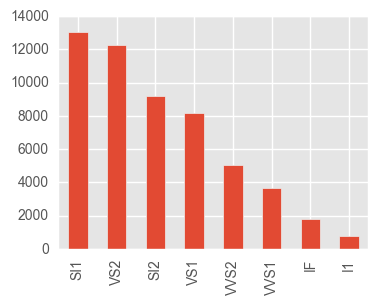

In [46]:
train['clarity'].value_counts().plot.bar()

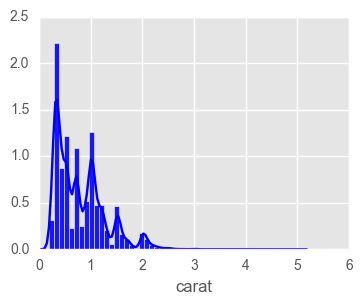

In [47]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(train['carat'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

We see immediately that the carat weights are positively skewed: most diamonds are around 1 carat or below but there are extreme cases of larger diamonds.
The plot above has fairly wide bins and there doesn't appear to be any data beyond a carat size of 3.5. We can make try to get more out of hour histogram by adding some additional arguments to control the size of the bins and limits of the x-axis:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F13347B9E8>]], dtype=object)

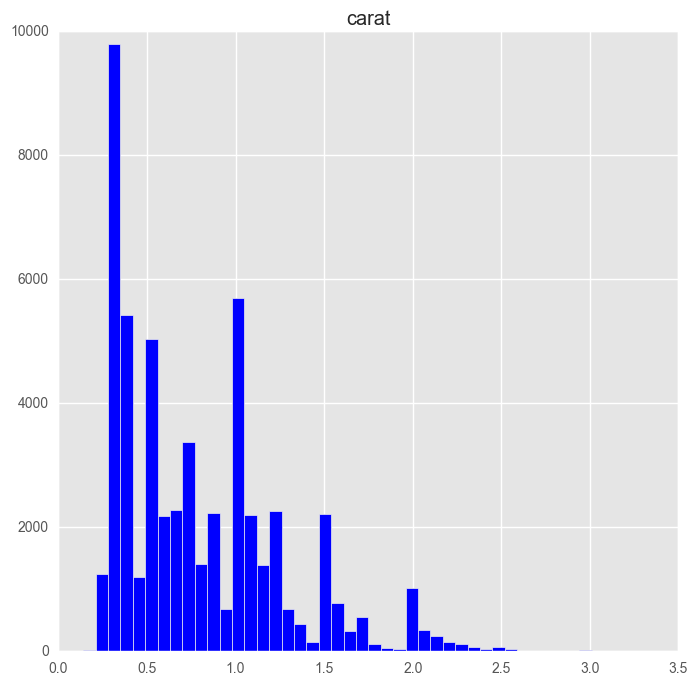

In [72]:
train.hist(column="carat",        # Column to plot
              figsize=(8,8),         # Plot size
              color="blue",          # Plot color
              bins=50,               # Use 50 bins
              range= (0,3.5))        # Limit x-axis range

This histogram gives us a better sense of some subtleties within the distribution, but we can't be sure that it contains all the data. Limiting the X-axis to 3.5 might have cut out some outliers with counts so small that they didn't show up as bars on our original chart. Let's check to see if any diamonds are larger than 3.5 carats:

In [73]:
train[train['carat'] > 3.5]

,carat,cut,color,clarity,depth,table,price,x,y,z
23645,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
26000,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26445,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26535,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27131,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27680,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03


It turns out that 9 diamonds are bigger than 3.5 carats. Should cutting these diamonds out concern us? On one hand, these outliers have very little bearing on the shape of the distribution. On the other hand, limiting the X-axis to 3.5 implies that no data lies beyond that point. For our own exploratory purposes this is not an issue but if we were to show this plot to someone else, it could be misleading. Including a note that 9 diamonds lie beyond the chart range could be helpful.

Often distribution of any monetary variable is highly skewed and vary over orders of magnitude. This results from path - dependencies (rich get richer) and/or multiplicative process ( year on year inflation). We can get a better understanding by taking a log.

##### Boxplots
Boxplots are another type of univariate plot for summarizing distributions of numeric data graphically. Let's make a boxplot of carat using the pd.boxplot() function:

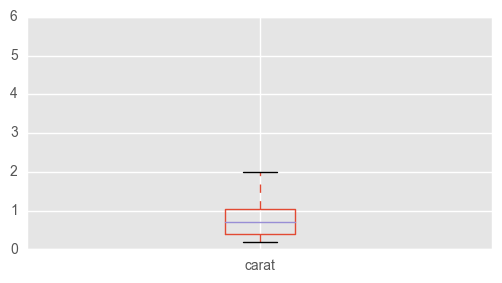

In [77]:
train.boxplot(column="carat")

the central box of the boxplot represents the middle 50% of the observations, the central bar is the median and the bars at the end of the dotted lines (whiskers) encapsulate the great majority of the observations. Circles that lie beyond the end of the whiskers are data points that may be outliers.
In this case, our data set has over 50,000 observations and we see many data points beyond the top whisker. We probably wouldn't want to classify all of those points as outliers, but the handful of diamonds at 4 carats and above are definitely far outside the norm.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F12E19B5C0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F12F4603C8>]], dtype=object)

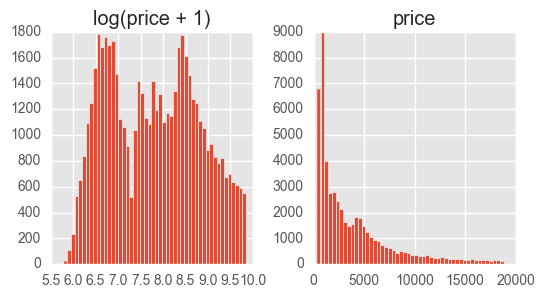

In [49]:
plt.rcParams['figure.figsize'] = (6.0, 3.0)
prices = pd.DataFrame({"price":train["price"], "log(price + 1)":np.log1p(train["price"])})
prices.hist(bins = 50)

This is a long tail distribution, with a high concentration of observations below the U$5,000 mark. The distribution is right-skewed with small amounts of very large prices driving up the mean, while the median remains a more robust measure of the center of the distribution.

Bin selection plays a significant role in visualizations, with a possible change in frequency readouts and shape of the curve or function. 

We can see that the data show some evidence of bomiodality on the scale of log10 scale. So there are two different kind of diamonds available for richer and porer buyers. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F13156A908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F131A385F8>]], dtype=object)

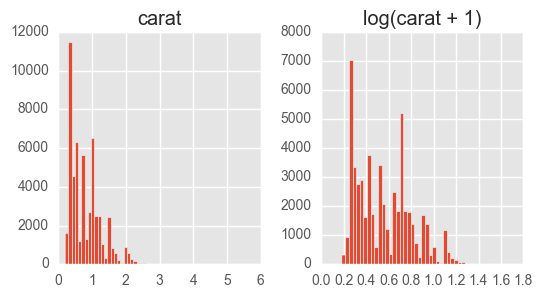

In [56]:
plt.rcParams['figure.figsize'] = (6.0, 3.0)
carat = pd.DataFrame({"carat":train["carat"], "log(carat + 1)":np.log1p(train["carat"])})
carat.hist(bins = 50)

Supposed we want to know the following:

1. How many cost less than U$500?

2. How many cost less than U$250?

3. How many cost equal to U$15,000 or more?

In [53]:
print((train['price'] < 500) .sum())
print((train['price'] < 250) .sum())
print((train['price'] >= 15000) .sum())

1729
0
1656


    * To select rows whose column value equals a scalar, some_value, use ==:

    df.loc[df['column_name'] == some_value]

    * To select rows whose column value is in an iterable, some_values, use isin:

    df.loc[df['column_name'].isin(some_values)]
    
http://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

In [63]:
#find the diamond with the most expensive price
train.loc[train.price == train['price'].max()]

,carat,cut,color,clarity,depth,table,price,x,y,z
27750,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


###### Premium cut for a diamond of 2.29 carat that sold at U$18,823

In [64]:
#find the cheapest diamond 
train.loc[train.price == train['price'].min()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


Looks like we have a tie between to units, both sold at U$326, one of 0.23 carat and Ideal cut, and another of 0.21 carats and Premium cut.

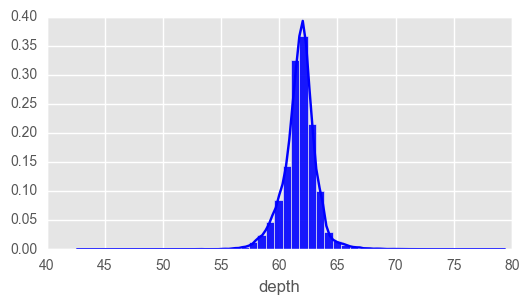

In [66]:
sns.distplot(train['depth'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

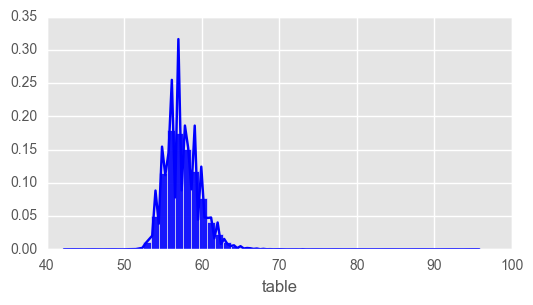

In [67]:
sns.distplot(train['table'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

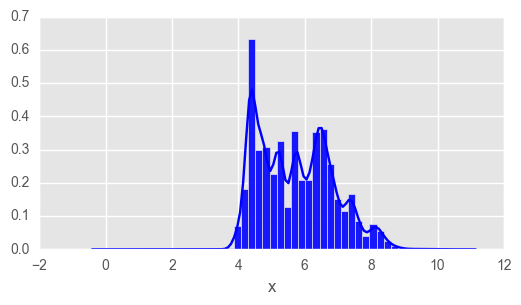

In [69]:
sns.distplot(train['x'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

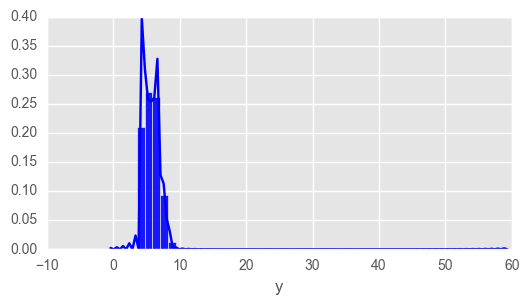

In [70]:
sns.distplot(train['y'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

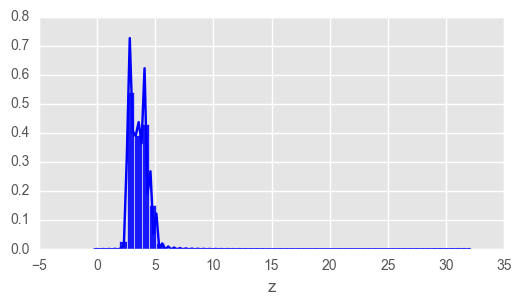

In [71]:
sns.distplot(train['z'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

##### Bi-variate Analysis

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

###### Let’s understand the possible combinations in detail:

* Continuous & Continuous: While doing bi-variate analysis between two continuous variables, we should look at scatter plot. It is a nifty way to find out the relationship between two variables. The pattern of scatter plot indicates the relationship between variables. The relationship can be linear or non-linear.

![photo](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Data_exploration_4.png)

Scatter plot shows the relationship between two variable but does not indicates the strength of relationship amongst them. To find the strength of the relationship, we use Correlation. Correlation varies between -1 and +1.

    * -1: perfect negative linear correlation
    * +1:perfect positive linear correlation and 
    * 0: No correlation

Correlation can be derived using following formula:

Correlation = Covariance(X,Y) / SQRT( Var(X)* Var(Y))

Various tools have function or functionality to identify correlation between variables. In Excel, function CORREL() is used to return the correlation between two variables and SAS uses procedure PROC CORR to identify the correlation. These function returns Pearson Correlation value to identify the relationship between two variables:)


![photo](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Data_exploration_51.png)

In above example, we have good positive relationship(0.65) 
between two variables X and Y.

* Categorical & Categorical: To find the relationship between two categorical variables, we can use following methods:

    * Two-way table: We can start analyzing the relationship by creating a two-way table of count and count%. The rows represents the category of one variable and the columns represent the categories of the other variable. We show count or count% of observations available in each combination of row and column categories.

    * Stacked Column Chart: This method is more of a visual form of Two-way table.
    
![photo](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Data_exploration_6-850x152.gif)

    * Chi-Square Test: This test is used to derive the statistical significance of relationship between the variables. Also, it tests whether the evidence in the sample is strong enough to generalize that the relationship for a larger population as well. Chi-square is based on the difference between the expected and observed frequencies in one or more categories in the two-way table. It returns probability for the computed chi-square distribution with the degree of freedom.

Probability of 0: It indicates that both categorical variable are dependent

Probability of 1: It shows that both variables are independent.

Probability less than 0.05: It indicates that the relationship between the variables is significant at 95% confidence. The chi-square test statistic for a test of independence of two categorical variables is found by:
![photo](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Data_exploration_7.png)

where O represents the observed frequency. E is the expected frequency under the null hypothesis and computed by:

![photo](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Data_exploration_8.png)

From previous two-way table, the expected count for product category 1 to be of small size is  0.22. It is derived by taking the row total for Size (9) times the column total for Product category (2) then dividing by the sample size (81). This is procedure is conducted for each cell. 
Statistical Measures used to analyze the power of relationship are:

    * Cramer’s V for Nominal Categorical Variable
    * Mantel-Haenszed Chi-Square for ordinal categorical variable.

Different data science language and tools have specific methods to perform chi-square test. In SAS, we can use Chisq as an option with Proc freq to perform this test.

 

* Categorical & Continuous: While exploring relation between categorical and continuous variables, we can draw box plots for each level of categorical variables. If levels are small in number, it will not show the statistical significance. To look at the statistical significance we can perform Z-test, T-test or ANOVA.

    * Z-Test/ T-Test:- Either test assess whether mean of two groups are statistically different from each other or not.
![Business Analytics](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/ztestformula1.jpg)


If the probability of Z is small then the difference of two averages is more significant. The T-test is very similar to Z-test but it is used when number of observation for both categories is less than 30.

![photo](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/ttest.png)


* ANOVA:- It assesses whether the average of more than two groups is statistically different.

Example: Suppose, we want to test the effect of five different exercises. For this, we recruit 20 men and assign one type of exercise to 4 men (5 groups). Their weights are recorded after a few weeks. We need to find out whether the effect of these exercises on them is significantly different or not. This can be done by comparing the weights of the 5 groups of 4 men each.

#### Continous and Continuos Plotting

###### Scatterplots
Scatterplots are bivariate (two variable) plots that take two numeric variables and plot data points on the x/y plane.To create a single scatterplot, use df.plot(kind="scatter")

###### Line Plots
Line plots are charts used to show the change in a numeric variable based on some other ordered variable. Line plots are often used to plot time series data to show the evolution of a variable over time. Line plots are the default plot type when using df.plot() so you don't have to specify the kind argument when making a line plot in pandas. Let's create some fake time series data and plot it with a line plot

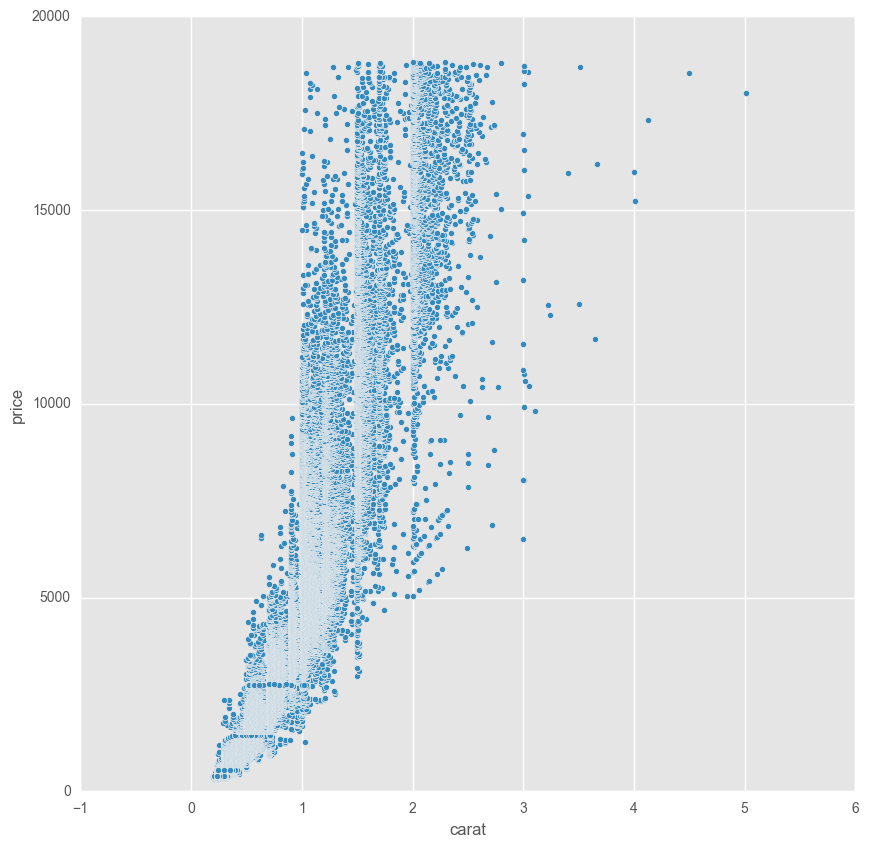

In [78]:
train.plot(kind="scatter",     # Create a scatterplot
              x="carat",          # Put carat on the x axis
              y="price",          # Put price on the y axis
              figsize=(10,10),
              ylim=(0,20000))  

It is a non-linear relationship and dispersion(variance) of the relationship also increases as carat size increases. Even though size/weight of the diamond set is a critical factor , the relationship is non-linear. Therefore, running a linear model will be a bad idea.

In [8]:
#taking the cube root of carat
train['cubed_root_carat'] = train['carat']** (1./3.)

In [20]:
train['log_price'] = np.log1p(train.price)

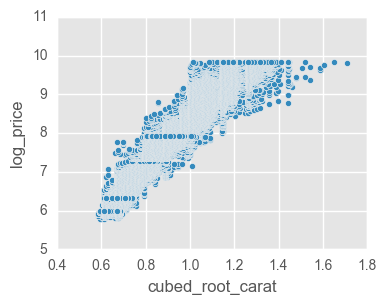

In [23]:
train.plot(kind="scatter",     # Create a scatterplot
              x= "cubed_root_carat",          # Put carat on the x axis
              y= "log_price")         # Put price on the y axis
                

Nice, looks like an almost-linear relationship after applying the transformations above to get our variables on a nice scale.

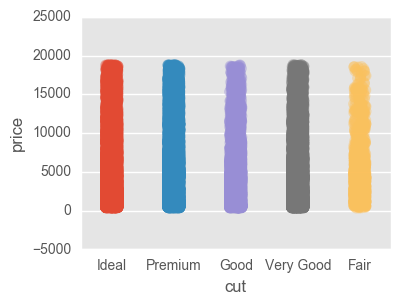

In [35]:
#overplotting - jitters
sns.stripplot(x='cut', y='price', data=train, size = 8,jitter=True,edgecolor='none', alpha=.40)
#sns.despine()

One way of making the scatter plot work is by adding jitter. With the jitter, a random amount is added or subtracted to each of the variables along the categorical axis. Where before, we may have had a categorical value vector that looked something like [1,2,2,2,1,3], post-jitter, they would look something like [1.05, 1.96, 2.05, 2, .97, 2.95]. Each value has had somewhere between [-0.05,0.05] added to it. This then means that when we plot our variables, we'll see a cloud of points that represent our distribution, rather than a long smear.

This gives us a better sense of how dense and sparse our data is at key places.

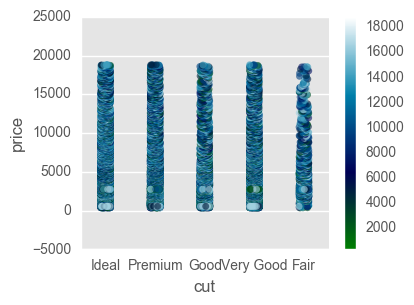

In [38]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

plot = sns.stripplot(x='cut', y='price', hue='color', data=train, 
              palette='ocean', 
              jitter=True, edgecolor='none', alpha=.60)
plot.get_legend().set_visible(False)
sns.despine()
train.describe()

# Drawing the side color bar
normalize = mcolors.Normalize(vmin=train['price'].min(), vmax=train['price'].max())
colormap = cm.ocean

for n in train['price']:
    plt.plot(color=colormap(normalize(n)))

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(train['price'])
plt.colorbar(scalarmappaple)

One of the most useful features of a boxplot is the ability to make side-by-side boxplots. A side-by-side boxplot takes a numeric variable and splits it on based on some categorical variable, drawing a different boxplot for each level of the categorical variable. Let's make a side-by-side boxplot of diamond price split by diamond clarity:

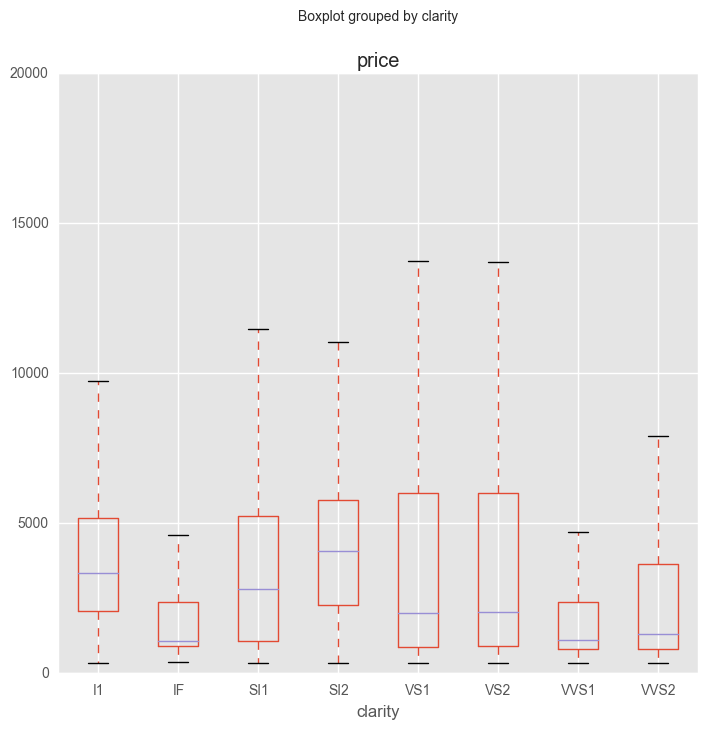

In [39]:
train.boxplot(column="price",        # Column to plot
                 by= "clarity",         # Column to split upon
                 figsize= (8,8))        # Figure size

The boxplot above is curious: we'd expect diamonds with better clarity to fetch higher prices and yet diamonds on the highest end of the clarity spectrum (IF = internally flawless) actually have lower median prices than low clarity diamonds! What gives? Perhaps another boxplot can shed some light on this situation:

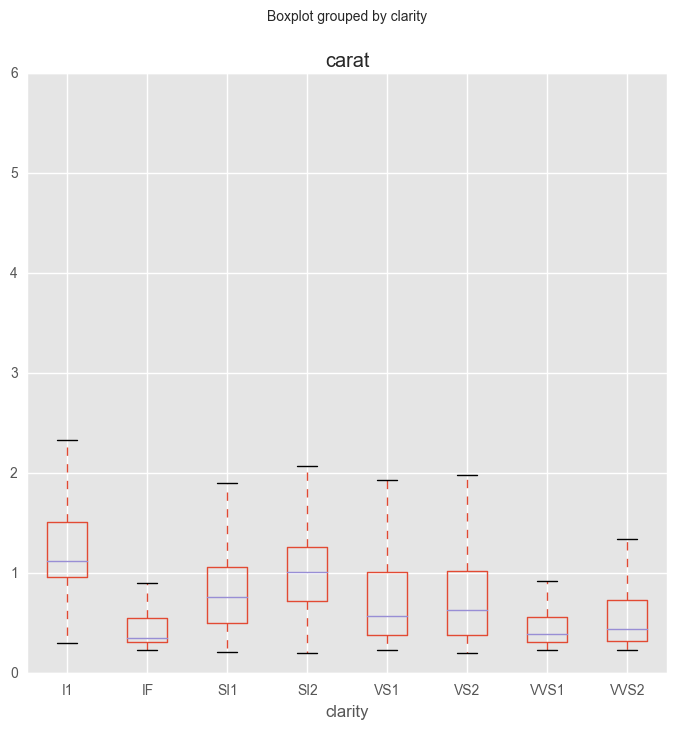

In [40]:
train.boxplot(column="carat",        # Column to plot
                 by= "clarity",         # Column to split upon
                 figsize= (8,8))        # Figure size

The plot above shows that diamonds with low clarity ratings also tend to be larger. Since size is an important factor in determining a diamond's value, it isn't too surprising that low clarity diamonds have higher median prices.

##### Density Plots
A density plot shows the distribution of a numeric variable with a continuous curve. It is similar to a histogram but without discrete bins, a density plot gives a better picture of the underlying shape of a distribution. Create a density plot with series.plot(kind="density")

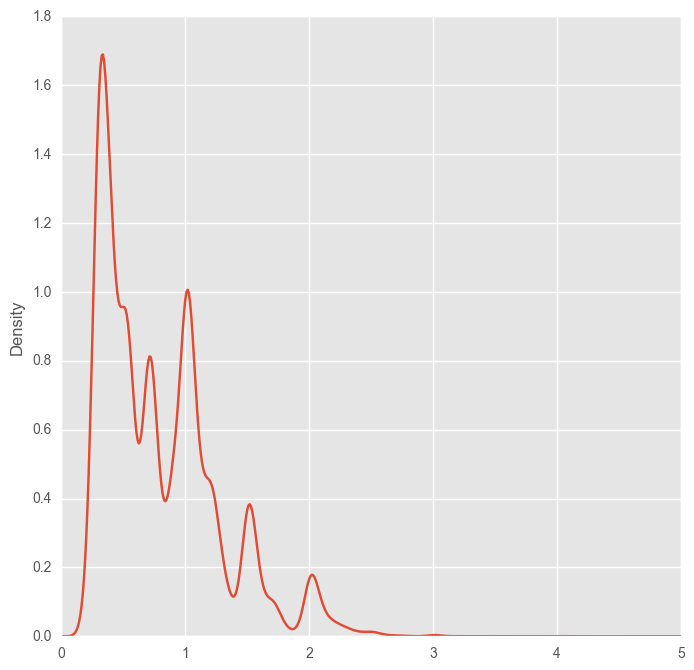

In [41]:
train["carat"].plot(kind="density",  # Create density plot
                      figsize=(8,8),    # Set figure size
                      xlim= (0,5))      # Limit x axis values

##### Barplots
Barplots are graphs that visually display counts of categorical variables. We can create a barplot by creating a table of counts for a certain variable using the pd.crosstab() function and then passing the counts to df.plot(kind="bar"):

In [43]:
clarity_table = pd.crosstab(index=train["clarity"], columns="count")
clarity_table

col_0,count
clarity,
I1,741
IF,1790
SI1,13065
SI2,9194
VS1,8171
VS2,12258
VVS1,3655
VVS2,5066


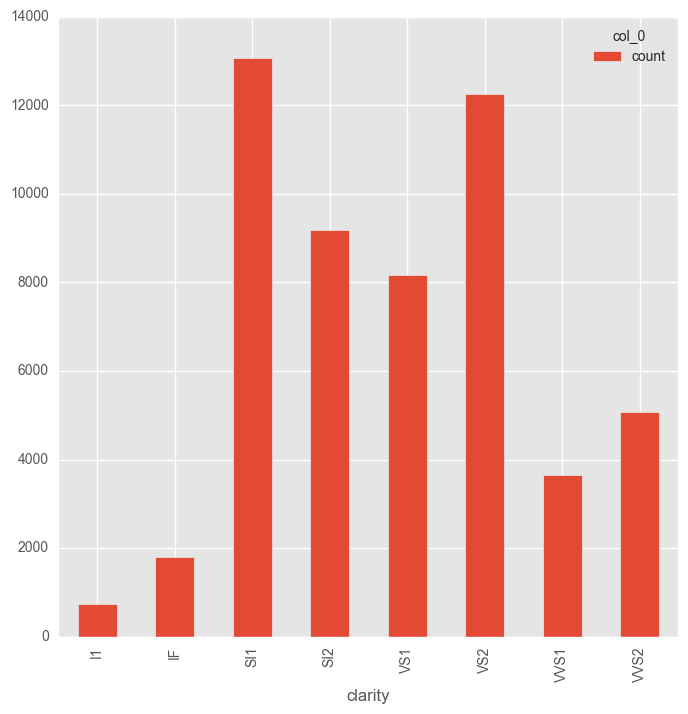

In [44]:
clarity_table.plot(kind="bar",
                 figsize=(8,8))

##### You can use a two dimensional table to create a stacked barplot. Stacked barplots show the distribution of a second categorical variable within each bar:

In [46]:
clarity_color_table = pd.crosstab(index=train["clarity"], 
                          columns=train["color"])

clarity_color_table

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,42,102,143,150,162,92,50
IF,73,158,385,681,299,143,51
SI1,2083,2426,2131,1976,2275,1424,750
SI2,1370,1713,1609,1548,1563,912,479
VS1,705,1281,1364,2148,1169,962,542
VS2,1697,2470,2201,2347,1643,1169,731
VVS1,252,656,734,999,585,355,74
VVS2,553,991,975,1443,608,365,131


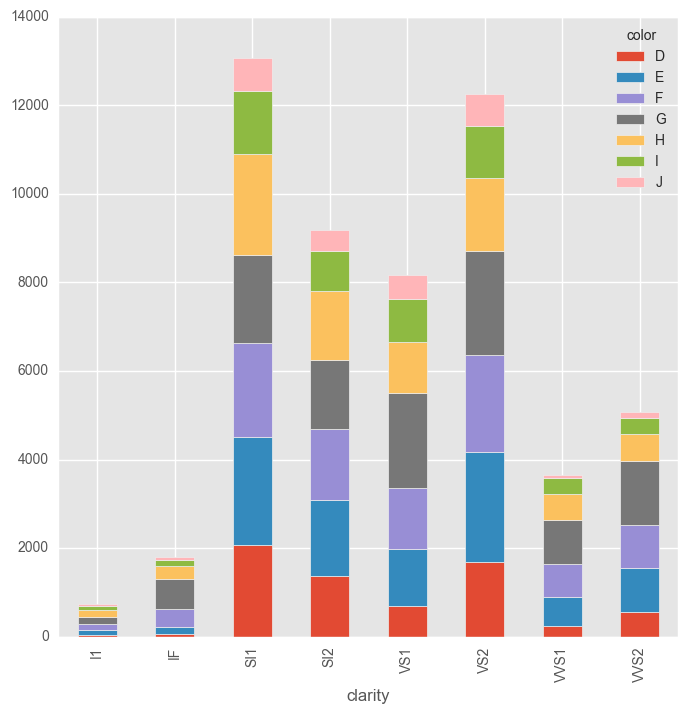

In [47]:
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

A grouped barplot is an alternative to a stacked barplot that gives each stacked section its own bar. To make a grouped barplot, do not include the stacked argument (or set stacked=False):

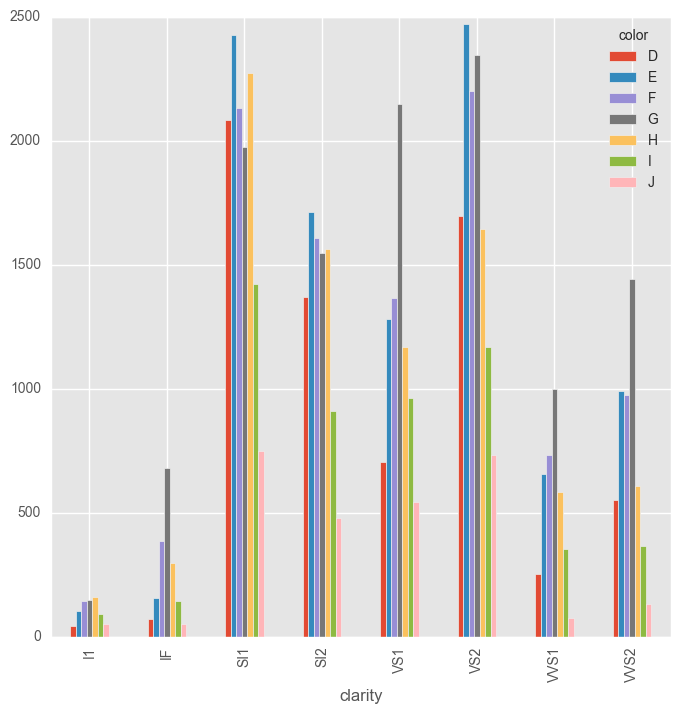

In [48]:
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

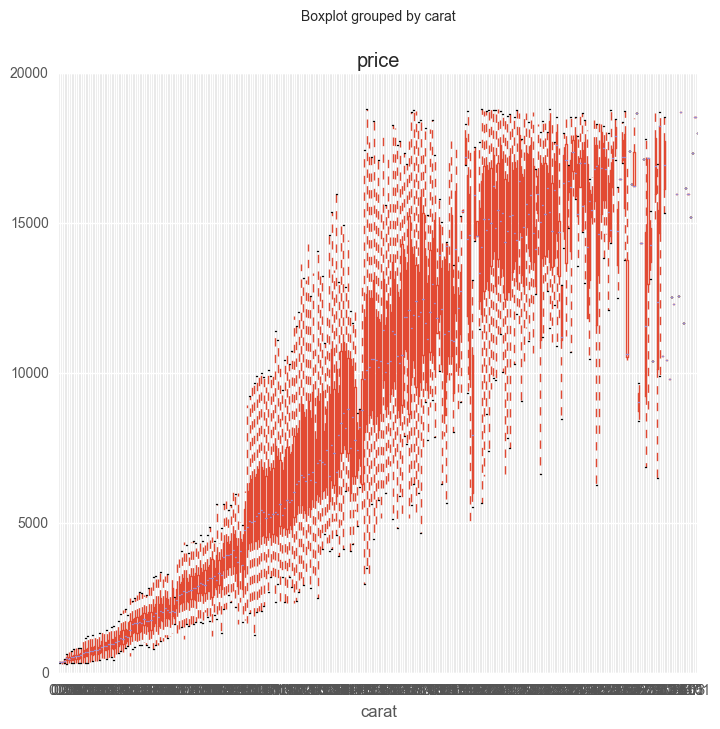

In [51]:
train.boxplot(column="price",        # Column to plot
                 by= "carat",         # Column to split upon
                 figsize= (8,8))        # Figure size

 The ideal cut tapers off smoothly at higher carats while the rest display some degree of volatility
in their medians.
We have unearthed some fascinating results but it is still unclear as to why most of the outliers
are of carats less than 1.5.